In [ ]:
!pip install gensim

In [ ]:
pip install PyPDF2

     |████████████████████████████████| 77 kB 4.7 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=b034a807f2a447e4dc79220107c714a88608c3d45381dd82656d4a07ba66116d
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [ ]:
pip install sumy    


     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 10.1 MB 15.7 MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21711 sha256=d81430f7d6114bcbc1ef55e2f9f7fc28c3ff19c803d631d8f6b0baf7c466c95d
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=9be2c9dd4a4dccab77a0e5f1414c615be85ba356d26b2eff2d3d42331462205f
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built breadability pycountry


In [ ]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=2a7423e5eca662fd14b26a24061b38de2fb6a9fbb5c1903827b0d1b3de1034f0
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

import PyPDF2
#import slate3k as slate
import datetime as date
import re
import string
import spacy
import nltk

from spacy import displacy
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
import math

from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.reduction import ReductionSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from nltk.corpus import stopwords
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords




In [ ]:
from stop_words import get_stop_words

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating a pdf file object to read pdf file
pdf_file_obj = open('/content/drive/MyDrive/DATA SCIENCE/ExcelR/Project/wings-of-fire.pdf','rb') # 5 pages done

In [ ]:
#creating pdf filereader object
pdf_reader = PyPDF2.PdfFileReader(pdf_file_obj)

In [ ]:
def displayInfoBook(pdf_reader):
    information = pdf_reader.getDocumentInfo()
    print("Author:",information.author)
    print("Creator:",information.creator)
    print("Producer:",information.producer)
    print("Subject:",information.subject)
    print("Title:",information.title)
    print("Number of Pages:",pdf_reader.getNumPages())
      
displayInfoBook(pdf_reader)

Author: Printers1
Creator: PageMaker 7.0
Producer: Acrobat Distiller 5.0 (Windows)
Subject: None
Title: wingoffine_intro.pmd
Number of Pages: 112


In [ ]:
no_pages = pdf_reader.getNumPages()

start = date.datetime.now()
corpus = ''
for i in range(10, 13):
    page = pdf_reader.getPage(i)
    corpus += page.extractText()

end = date.datetime.now()
pdf_file_obj.close()

print("Time taken =",end-start)
print("length of corpus =",len(corpus))
print(corpus)

Time taken = 0:00:00.041986
length of corpus = 13673
WINGS OF FIRE2ORIENTATION
Whenever human beings find themselves alone, as a natural reaction,they start looking for company. Whenever they are in trouble, they look

for someone to help them. Whenever they reach an impasse, they look
to someone to show them the way out. Every recurrent anguish, longing,
and desire finds its own special helper. For the people who come to me

in distress, I am but a go-between in their effort to propitiate demonic
forces with prayers and offerings. This is not a correct approach at all
and should never be followed. One must understand the difference
between a fear-ridden vision of destiny and the vision that enables us to

seek the enemy of fulfilment within ourselves.I remember my father starting his day at 4 a.m. by reading the namazbefore dawn. After the namaz, he used to walk down to a small coconut

grove we owned, about 4 miles from our home. He would return, with
about a dozen coconuts tied toge

In [ ]:
type(corpus)

str

# Text Cleaning

In [ ]:
corpus = corpus.replace("'s",'') # replaces apostrophe s
corpus = corpus.replace('\n','') # replaces newline character
corpus = re.sub(r'\([^()]*\)','',corpus) # removes text inside brackets including brackets
corpus = re.sub(r'(http|https|www)\S+', '', corpus) # replaces www.digitalsherpa.com,http://www.articlesbase.com/technology
corpus = re.sub(r'\<.+\>','',corpus) # replaces <link rel=ﬂcanonicalﬂ href=ﬂﬂ />
corpus = re.sub(r'\s+',' ',corpus) # replaces more than 2 spaces with 1 space
corpus = corpus.lower() # converts the text to lower
corpus = re.sub(r'/[0-9]+\.?[0-9]*/','',corpus)

#index = ["syllabus", "indian culture content", "1 culture", "2 family structure and marriage", "2.1 arranged marriage", "2.2 wedding rituals", "3 greetings", "4 festivals", "5 animals", "6 cuisine", "7 clothing", "8 languages and literature", "9 performing arts", "10 visual arts", "10.1 painting", "10.2 sculpture", "10.3 architecture", "11 sports and martial arts", "11.1 sports", "11.2 indian martial arts", "12 popular media", "12.1 television", "12.2 cinema", "13 perceptions of indian culture", "indian culture", "tutorial"]

#corpus = corpus.replace(index,'')

print("corpus length =",len(corpus))
corpus

corpus length = 13404


'wings of fire2orientationwhenever human beings find themselves alone, as a natural reaction,they start looking for company. whenever they are in trouble, they lookfor someone to help them. whenever they reach an impasse, they lookto someone to show them the way out. every recurrent anguish, longing,and desire finds its own special helper. for the people who come to mein distress, i am but a go-between in their effort to propitiate demonicforces with prayers and offerings. this is not a correct approach at alland should never be followed. one must understand the differencebetween a fear-ridden vision of destiny and the vision that enables us toseek the enemy of fulfilment within ourselves.i remember my father starting his day at 4 a.m. by reading the namazbefore dawn. after the namaz, he used to walk down to a small coconutgrove we owned, about 4 miles from our home. he would return, withabout a dozen coconuts tied together thrown over his shoulder, and onlythen would he have his break

# Tokanization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(corpus)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 996 samples and 2367 outcomes>


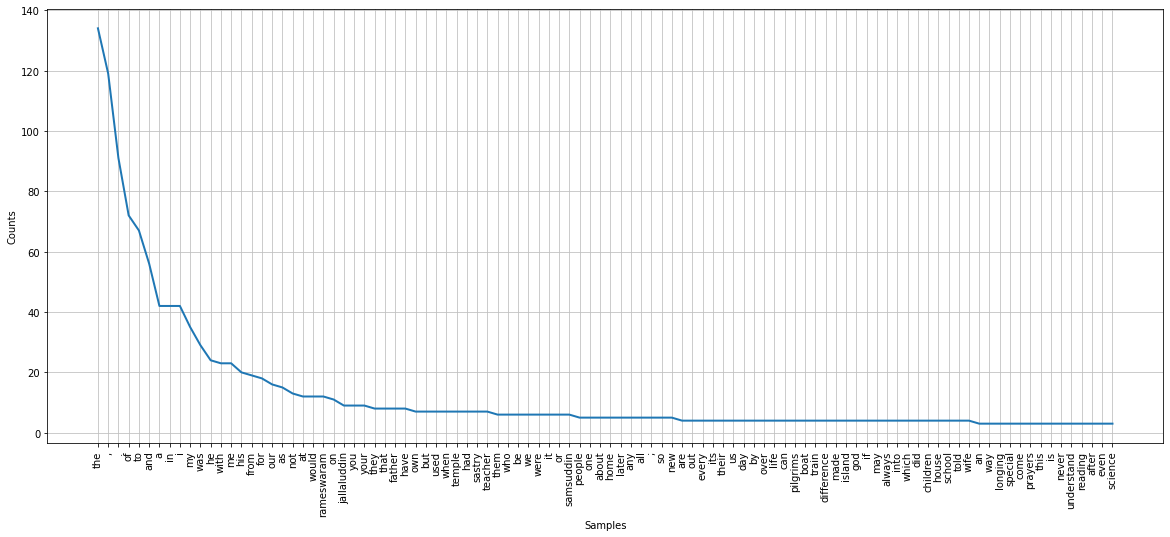

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

In [ ]:
# from nltk
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#removing punctuation, stop words


In [ ]:
filtered_tokens = []
for word in text_tokens:
    if word not in punctuation:
        if word not in stop_words:
            filtered_tokens.append(word)

print("length of tokens =",len(filtered_tokens))            
print(filtered_tokens[0:100])

length of tokens = 1181
['wings', 'fire2orientationwhenever', 'human', 'beings', 'find', 'alone', 'natural', 'reaction', 'start', 'looking', 'company', 'whenever', 'trouble', 'lookfor', 'someone', 'help', 'whenever', 'reach', 'impasse', 'lookto', 'someone', 'show', 'way', 'every', 'recurrent', 'anguish', 'longing', 'desire', 'finds', 'special', 'helper', 'people', 'come', 'mein', 'distress', 'go-between', 'effort', 'propitiate', 'demonicforces', 'prayers', 'offerings', 'correct', 'approach', 'alland', 'never', 'followed', 'one', 'must', 'understand', 'differencebetween', 'fear-ridden', 'vision', 'destiny', 'vision', 'enables', 'us', 'toseek', 'enemy', 'fulfilment', 'within', 'ourselves.i', 'remember', 'father', 'starting', 'day', '4', 'a.m.', 'reading', 'namazbefore', 'dawn', 'namaz', 'used', 'walk', 'small', 'coconutgrove', 'owned', '4', 'miles', 'home', 'would', 'return', 'withabout', 'dozen', 'coconuts', 'tied', 'together', 'thrown', 'shoulder', 'onlythen', 'would', 'breakfast', 're

# most 10 common words

In [ ]:
# creating dictionaries of keys as words and values as frequency of that word
word_frequencies = {} 
for word in filtered_tokens:
    if word not in word_frequencies.keys():
        word_frequencies[word] = 1
    else:
        word_frequencies[word] +=1
print(word_frequencies)

{'wings': 1, 'fire2orientationwhenever': 1, 'human': 1, 'beings': 1, 'find': 2, 'alone': 2, 'natural': 1, 'reaction': 1, 'start': 1, 'looking': 1, 'company': 2, 'whenever': 2, 'trouble': 1, 'lookfor': 1, 'someone': 2, 'help': 2, 'reach': 1, 'impasse': 1, 'lookto': 1, 'show': 1, 'way': 3, 'every': 4, 'recurrent': 1, 'anguish': 1, 'longing': 3, 'desire': 1, 'finds': 1, 'special': 3, 'helper': 1, 'people': 5, 'come': 3, 'mein': 1, 'distress': 1, 'go-between': 1, 'effort': 1, 'propitiate': 1, 'demonicforces': 1, 'prayers': 3, 'offerings': 1, 'correct': 1, 'approach': 1, 'alland': 1, 'never': 3, 'followed': 1, 'one': 5, 'must': 2, 'understand': 3, 'differencebetween': 1, 'fear-ridden': 1, 'vision': 2, 'destiny': 1, 'enables': 1, 'us': 4, 'toseek': 1, 'enemy': 1, 'fulfilment': 1, 'within': 1, 'ourselves.i': 1, 'remember': 1, 'father': 8, 'starting': 1, 'day': 4, '4': 2, 'a.m.': 1, 'reading': 3, 'namazbefore': 1, 'dawn': 1, 'namaz': 1, 'used': 7, 'walk': 1, 'small': 2, 'coconutgrove': 1, 'own

In [ ]:
list_keys = list(word_frequencies.keys())
list_values = list(word_frequencies.values())
#list_keys
#list_values
#converting the dictionary to dataframe
#so that sorting and plotting will become easier
wordcount_table = pd.DataFrame()
wordcount_table['words'] = list_keys
wordcount_table['wordcount'] = list_values
word_count_t = wordcount_table.sort_values(by='wordcount', ascending=False).head(20)
word_count_t

,words,wordcount
75,would,12
138,rameswaram,12
147,jallaluddin,9
59,father,8
609,teacher,7
68,used,7
227,temple,7
541,sastry,7
363,samsuddin,6
608,new,5


In [ ]:
fig = px.bar(word_count_t, x='words', y='wordcount',
             color='wordcount',
             height=400, title='Top 10 most common words',
             color_continuous_scale=px.colors.sequential.Viridis             
            )
fig.show() 

# Bigrams

In [ ]:
bigrams = ngrams(corpus.split(), 2)

bigram_dict = {}
for item in bigrams:
    #print(item)
    itemText = item[0]+' '+item[1]
    if itemText not in bigram_dict.keys():
        bigram_dict[itemText] = 1
    else:    
        bigram_dict[itemText] +=1 
    
bigram_dict

{'wings of': 1,
 'of fire2orientationwhenever': 1,
 'fire2orientationwhenever human': 1,
 'human beings': 1,
 'beings find': 1,
 'find themselves': 1,
 'themselves alone,': 1,
 'alone, as': 1,
 'as a': 3,
 'a natural': 1,
 'natural reaction,they': 1,
 'reaction,they start': 1,
 'start looking': 1,
 'looking for': 1,
 'for company.': 1,
 'company. whenever': 1,
 'whenever they': 2,
 'they are': 2,
 'are in': 1,
 'in trouble,': 1,
 'trouble, they': 1,
 'they lookfor': 1,
 'lookfor someone': 1,
 'someone to': 2,
 'to help': 1,
 'help them.': 1,
 'them. whenever': 1,
 'they reach': 1,
 'reach an': 1,
 'an impasse,': 1,
 'impasse, they': 1,
 'they lookto': 1,
 'lookto someone': 1,
 'to show': 1,
 'show them': 1,
 'them the': 1,
 'the way': 2,
 'way out.': 1,
 'out. every': 1,
 'every recurrent': 1,
 'recurrent anguish,': 1,
 'anguish, longing,and': 1,
 'longing,and desire': 1,
 'desire finds': 1,
 'finds its': 1,
 'its own': 1,
 'own special': 1,
 'special helper.': 1,
 'helper. for': 1,
 '

In [ ]:
#converting dictionary to dataframe for sorting and plotting
list_bigram_key = list(bigram_dict.keys()) #converts dictionary keys to list of keys
list_bigram_val = list(bigram_dict.values()) # converts dictionary values to list of values

# creating table for Bigrams
bigram_table = pd.DataFrame()
bigram_table['Bigrams']    = list_bigram_key
bigram_table['Frequency']  = list_bigram_val

bigram_table1= bigram_table.sort_values(by='Frequency', ascending=False,).head(10)
bigram_table1

,Bigrams,Frequency
540,in the,12
328,of the,11
180,in my,7
108,my father,6
125,used to,6
236,on the,6
775,to the,6
619,was the,5
878,when i,5
336,with a,5


[Text(0, 0, 'in the'),
 Text(0, 0, 'of the'),
 Text(0, 0, 'in my'),
 Text(0, 0, 'my father'),
 Text(0, 0, 'used to'),
 Text(0, 0, 'on the'),
 Text(0, 0, 'to the'),
 Text(0, 0, 'was the'),
 Text(0, 0, 'when i'),
 Text(0, 0, 'with a')]

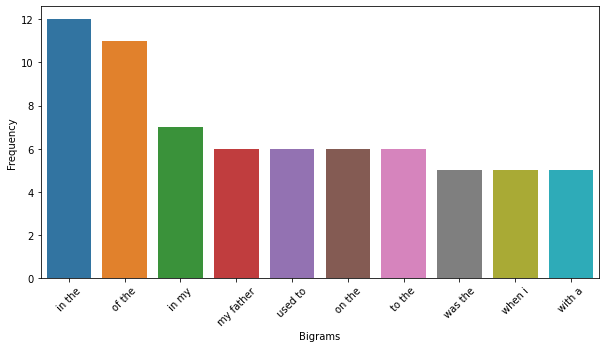

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=bigram_table1['Bigrams'],y=bigram_table1['Frequency'])
plot.set_xticklabels(rotation=45,labels = bigram_table1['Bigrams'])


# Trigrams

In [ ]:
trigrams = ngrams(corpus.split(), 3)

trigram_dict = {}
for item in trigrams:
    #print(item)
    itemText = item[0]+' '+item[1]+' '+item[2]
    if itemText not in trigram_dict.keys():
        trigram_dict[itemText] = 1
    else:    
        trigram_dict[itemText] +=1 
    
trigram_dict

{'wings of fire2orientationwhenever': 1,
 'of fire2orientationwhenever human': 1,
 'fire2orientationwhenever human beings': 1,
 'human beings find': 1,
 'beings find themselves': 1,
 'find themselves alone,': 1,
 'themselves alone, as': 1,
 'alone, as a': 1,
 'as a natural': 1,
 'a natural reaction,they': 1,
 'natural reaction,they start': 1,
 'reaction,they start looking': 1,
 'start looking for': 1,
 'looking for company.': 1,
 'for company. whenever': 1,
 'company. whenever they': 1,
 'whenever they are': 1,
 'they are in': 1,
 'are in trouble,': 1,
 'in trouble, they': 1,
 'trouble, they lookfor': 1,
 'they lookfor someone': 1,
 'lookfor someone to': 1,
 'someone to help': 1,
 'to help them.': 1,
 'help them. whenever': 1,
 'them. whenever they': 1,
 'whenever they reach': 1,
 'they reach an': 1,
 'reach an impasse,': 1,
 'an impasse, they': 1,
 'impasse, they lookto': 1,
 'they lookto someone': 1,
 'lookto someone to': 1,
 'someone to show': 1,
 'to show them': 1,
 'show them the'

In [ ]:
#converting dictionary to dataframe for sorting and plotting
list_trigram_key = list(trigram_dict.keys()) #converts dictionary keys to list of keys
list_trigram_val = list(trigram_dict.values()) # converts dictionary values to list of values

# creating table for noun words frequency
trigram_table = pd.DataFrame()
trigram_table['Trigrams']    = list_trigram_key
trigram_table['Frequency']  = list_trigram_val
trigram_table.sort_values(by='Frequency', ascending=False, inplace=True)
trigram_table_1           = trigram_table.head(10)
trigram_table_1

,Trigrams,Frequency
917,when i was,3
390,the difference in,2
1614,invited me to,2
642,the time i,2
1363,me as a,2
126,he used to,2
940,i used to,2
910,second world war,2
1133,my three brothers,2
1433,i shifted to,2


[Text(0, 0, 'when i was'),
 Text(0, 0, 'the difference in'),
 Text(0, 0, 'invited me to'),
 Text(0, 0, 'the time i'),
 Text(0, 0, 'me as a'),
 Text(0, 0, 'he used to'),
 Text(0, 0, 'i used to'),
 Text(0, 0, 'second world war'),
 Text(0, 0, 'my three brothers'),
 Text(0, 0, 'i shifted to')]

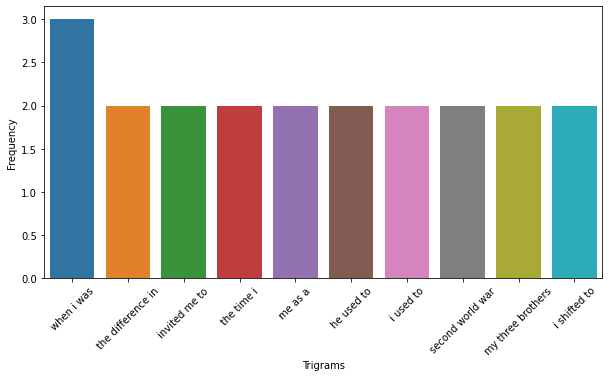

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=trigram_table_1['Trigrams'],y=trigram_table_1['Frequency'])
plot.set_xticklabels(rotation=45,labels = trigram_table_1['Trigrams'])

# Sentence tokenize

In [ ]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(corpus)

In [ ]:
sentences

['wings of fire2orientationwhenever human beings find themselves alone, as a natural reaction,they start looking for company.',
 'whenever they are in trouble, they lookfor someone to help them.',
 'whenever they reach an impasse, they lookto someone to show them the way out.',
 'every recurrent anguish, longing,and desire finds its own special helper.',
 'for the people who come to mein distress, i am but a go-between in their effort to propitiate demonicforces with prayers and offerings.',
 'this is not a correct approach at alland should never be followed.',
 'one must understand the differencebetween a fear-ridden vision of destiny and the vision that enables us toseek the enemy of fulfilment within ourselves.i remember my father starting his day at 4 a.m. by reading the namazbefore dawn.',
 'after the namaz, he used to walk down to a small coconutgrove we owned, about 4 miles from our home.',
 'he would return, withabout a dozen coconuts tied together thrown over his shoulder, and

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,wings of fire2orientationwhenever human beings...
1,"whenever they are in trouble, they lookfor som..."
2,"whenever they reach an impasse, they lookto so..."
3,"every recurrent anguish, longing,and desire fi..."
4,"for the people who come to mein distress, i am..."
...,...
88,"thetown of ramanathapuram was a thriving, fact..."
89,i missed my home and grabbed every opportunity...
90,the pull of educational opportunities at raman...
91,"in fact, she used to prepare twelve distinctly..."


# Named entity recognition

In [ ]:
#Named entity recognition for sentences between 10 to 20
ner = spacy.load('en_core_web_sm')

for i in range(10,20):
    one_sent = sentences[i]
    doc_block = ner(one_sent)
    displacy.render(doc_block, style='ent',  jupyter=True)  

In [ ]:
for token in doc_block[0:50]:
    print(token, token.pos_)

as SCONJ
we PRON
started VERB
from ADP
mosquestreet PROPN
and CCONJ
made VERB
our DET
way NOUN
towards ADP
the DET
sandy ADJ
shores NOUN
of ADP
the DET
island NOUN
, PUNCT
jallaluddin PROPN
and CCONJ
i PRON
talked VERB
mainly ADV
of ADP
spiritual ADJ
matters NOUN
. PUNCT


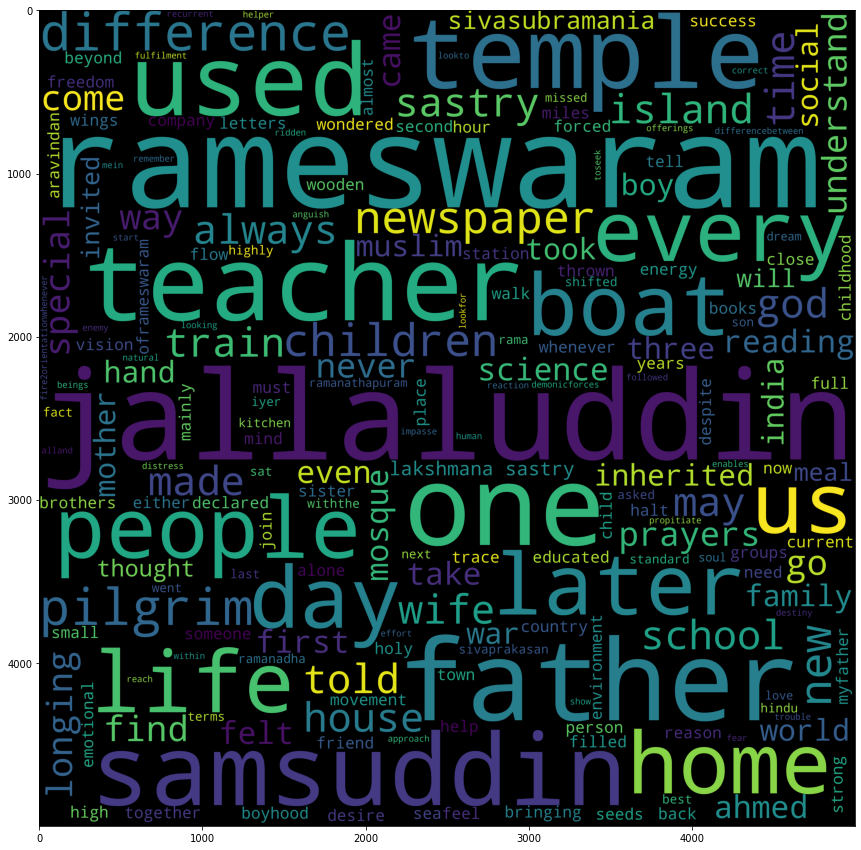

In [ ]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black',width = 5000,height = 5000,).generate(corpus)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_stw)

In [ ]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
          
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [ ]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [ ]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [ ]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [ ]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [ ]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [ ]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [ ]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [ ]:
# 1 Sentence Tokenize
sentences = sent_tokenize(corpus)
total_documents = len(sentences)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Create the Frequency matrix of the words in each sentence.

In [ ]:
freq_matrix = _create_frequency_matrix(sentences)

In [ ]:
freq_matrix

{'a day™s collect': {'.': 1,
  'anna': 1,
  'collect': 1,
  'day™': 1,
  'one': 1,
  'princ': 1,
  'sum': 1,
  'wouldfetch': 1},
 'a few readers w': {',': 1,
  '.': 1,
  ';': 1,
  'almost': 1,
  'amor': 1,
  'andjinnah': 1,
  'cast': 1,
  'cosmopolitan': 1,
  'current': 1,
  'discuss': 1,
  'ev': 1,
  'final': 1,
  'flow': 1,
  'gandhi': 1,
  'high': 1,
  'hindus.dinamani': 1,
  'hitler': 1,
  'mahatma': 1,
  'mighti': 1,
  'movement': 1,
  'newspap': 1,
  'ofperiyar': 1,
  'outlook': 1,
  'polit': 1,
  'ramaswamy™': 1,
  'reader': 1,
  'sought': 1,
  'wa': 1,
  'would': 2},
 'after the namaz': {',': 2,
  '.': 1,
  '4': 1,
  'coconutgrov': 1,
  'home': 1,
  'mile': 1,
  'namaz': 1,
  'small': 1,
  'use': 1,
  'walk': 1},
 'all these boys ': {'.': 1,
  'boy': 1,
  'famili': 1,
  'hindubrahmin': 1,
  'orthodox': 1},
 'and once anindi': {',': 4,
  '.': 1,
  'anindividu': 1,
  'back': 1,
  'bondag': 1,
  'embark': 1,
  'emot': 1,
  'father': 1,
  'freedom': 1,
  'happi': 1,
  'hi': 1,
  'm

#  Calculate TermFrequency and generate a matrix

In [ ]:
tf_matrix = _create_tf_matrix(freq_matrix)


In [ ]:
tf_matrix

{'a day™s collect': {'.': 0.125,
  'anna': 0.125,
  'collect': 0.125,
  'day™': 0.125,
  'one': 0.125,
  'princ': 0.125,
  'sum': 0.125,
  'wouldfetch': 0.125},
 'a few readers w': {',': 0.034482758620689655,
  '.': 0.034482758620689655,
  ';': 0.034482758620689655,
  'almost': 0.034482758620689655,
  'amor': 0.034482758620689655,
  'andjinnah': 0.034482758620689655,
  'cast': 0.034482758620689655,
  'cosmopolitan': 0.034482758620689655,
  'current': 0.034482758620689655,
  'discuss': 0.034482758620689655,
  'ev': 0.034482758620689655,
  'final': 0.034482758620689655,
  'flow': 0.034482758620689655,
  'gandhi': 0.034482758620689655,
  'high': 0.034482758620689655,
  'hindus.dinamani': 0.034482758620689655,
  'hitler': 0.034482758620689655,
  'mahatma': 0.034482758620689655,
  'mighti': 0.034482758620689655,
  'movement': 0.034482758620689655,
  'newspap': 0.034482758620689655,
  'ofperiyar': 0.034482758620689655,
  'outlook': 0.034482758620689655,
  'polit': 0.034482758620689655,
  'ra

#  creating table for documents per words

In [ ]:
count_doc_per_words = _create_documents_per_words(freq_matrix)
count_doc_per_words

{'!': 2,
 ',': 59,
 '.': 91,
 '100': 1,
 '15': 1,
 '1939': 1,
 '4': 2,
 ';': 4,
 '?': 1,
 'a.m.': 1,
 'abl': 1,
 'aboutth': 1,
 'abreast': 1,
 'acap': 1,
 'acat': 1,
 'achievementsof': 1,
 'across': 1,
 'age': 1,
 'agencywa': 1,
 'ahm': 3,
 'al': 1,
 'alland': 1,
 'alli': 1,
 'almighty.i': 1,
 'almost': 2,
 'alon': 2,
 'along': 1,
 'aloud': 1,
 'although': 1,
 'alway': 4,
 'amongstourselv': 1,
 'amor': 1,
 'andjinnah': 1,
 'andrespons': 1,
 'andsel': 1,
 'andth': 1,
 'andwould': 1,
 'anest': 1,
 'angri': 1,
 'anguish': 1,
 'ani': 5,
 'anindividu': 1,
 'anna': 1,
 'annual': 1,
 'anybodyin': 1,
 'apolog': 1,
 'applic': 1,
 'approach': 1,
 'aravindan': 2,
 'area': 1,
 'around': 1,
 'arrang': 1,
 'arrangefor': 1,
 'arriv': 1,
 'asa': 1,
 'ask': 2,
 'astrolog': 1,
 'ate': 1,
 'atmospher': 1,
 'atrameswaram': 1,
 'attempt': 1,
 'attract': 1,
 'attributemi': 1,
 'author': 1,
 'awar': 1,
 'away': 1,
 'awayto': 1,
 'azad': 1,
 'back': 2,
 'barrier': 1,
 'beauti': 1,
 'becam': 1,
 'becaus': 3,
 

# Calculate IDF and generate a matrix

In [ ]:
idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
idf_matrix


{'a day™s collect': {'.': 0.009441556232841484,
  'anna': 1.968482948553935,
  'collect': 1.667452952889954,
  'day™': 1.968482948553935,
  'one': 1.2695129442179163,
  'princ': 1.968482948553935,
  'sum': 1.968482948553935,
  'wouldfetch': 1.968482948553935},
 'a few readers w': {',': 0.19763093691179093,
  '.': 0.009441556232841484,
  ';': 1.3664229572259727,
  'almost': 1.667452952889954,
  'amor': 1.968482948553935,
  'andjinnah': 1.968482948553935,
  'cast': 1.968482948553935,
  'cosmopolitan': 1.968482948553935,
  'current': 1.667452952889954,
  'discuss': 1.968482948553935,
  'ev': 1.968482948553935,
  'final': 1.968482948553935,
  'flow': 1.667452952889954,
  'gandhi': 1.968482948553935,
  'high': 1.667452952889954,
  'hindus.dinamani': 1.968482948553935,
  'hitler': 1.968482948553935,
  'mahatma': 1.968482948553935,
  'mighti': 1.968482948553935,
  'movement': 1.667452952889954,
  'newspap': 1.2695129442179163,
  'ofperiyar': 1.968482948553935,
  'outlook': 1.968482948553935,


# Calculate TF-IDF and generate a matrix

In [ ]:
tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
tf_idf_matrix

{'a day™s collect': {'.': 0.0011801945291051855,
  'anna': 0.24606036856924188,
  'collect': 0.20843161911124425,
  'day™': 0.24606036856924188,
  'one': 0.15868911802723953,
  'princ': 0.24606036856924188,
  'sum': 0.24606036856924188,
  'wouldfetch': 0.24606036856924188},
 'a few readers w': {',': 0.006814859893510032,
  '.': 0.00032557090458074084,
  ';': 0.04711803300779216,
  'almost': 0.05749837768586048,
  'amor': 0.06787872236392879,
  'andjinnah': 0.06787872236392879,
  'cast': 0.06787872236392879,
  'cosmopolitan': 0.06787872236392879,
  'current': 0.05749837768586048,
  'discuss': 0.06787872236392879,
  'ev': 0.06787872236392879,
  'final': 0.06787872236392879,
  'flow': 0.05749837768586048,
  'gandhi': 0.06787872236392879,
  'high': 0.05749837768586048,
  'hindus.dinamani': 0.06787872236392879,
  'hitler': 0.06787872236392879,
  'mahatma': 0.06787872236392879,
  'mighti': 0.06787872236392879,
  'movement': 0.05749837768586048,
  'newspap': 0.043776308421307454,
  'ofperiyar

# Important Algorithm: score the sentences

In [ ]:
sentence_scores = _score_sentences(tf_idf_matrix)
sentence_scores

{'a day™s collect': 0.1998253468142248,
 'a few readers w': 0.058537121067872365,
 'after the namaz': 0.13404378991481705,
 'all these boys ': 0.28420888400259753,
 'and once anindi': 0.05542688590289495,
 'as children, no': 0.11655937341595769,
 'as he put me on': 0.11039210026379878,
 'as we started f': 0.09814527036214776,
 'but it was the ': 0.10388865382291389,
 'but soon india ': 0.16004681386063593,
 'by local standa': 0.0611135619847959,
 'circlingaround ': 0.07766149271951972,
 'does the seagul': 0.17612947478233226,
 'events from the': 0.06339536656209223,
 'every recurrent': 0.13693174530728675,
 'for reasons i h': 0.12733055192997703,
 'for the people ': 0.1257899356131968,
 'forthey have th': 0.12601646856644455,
 'half a century ': 0.06803003299176515,
 'he looked utter': 0.1985881398447307,
 'he used to spen': 0.06851725791725936,
 'he was the sole': 0.2159076403598581,
 'he worked at bu': 0.10402212719918509,
 'he would presen': 0.16761515182848744,
 'he would return': 

# Find the threshold

In [ ]:
threshold = _find_average_score(sentence_scores)
threshold

0.13378116285778022

# Important Algorithm: Generate the summary

In [ ]:
summary = _generate_summary(sentences, sentence_scores, 1.3 * threshold)
summary

' whenever they are in trouble, they lookfor someone to help them. this is not a correct approach at alland should never be followed. the pambanbridge collapsed with a train full of passengers on it. hewas about 15 years older than i and used to call me azad. i only wondered whetherjallaluddin had any other special connection to god. he wrote letters for almost anybodyin need, be they letters of application or otherwise. he was the sole distributor for newspapers inrameswaram. a day™s collection wouldfetch me the princely sum of one anna. samsuddin helped me earn my firstwages. all these boys were from orthodox hindubrahmin families. he looked utterly downcast as i shifted to my seatin the last row. she refused to serve me in her kitchen. his wifewatched us from behind the kitchen door. ﬁindians will build their own india,ﬂ declared gandhiji. thewhole country was filled with an unprecedented optimism. i know you have to go awayto grow. does the seagull not fly across the sun, alone and

In [ ]:
hyp = str(corpus).split()
hyp

['wings',
 'of',
 'fire2orientationwhenever',
 'human',
 'beings',
 'find',
 'themselves',
 'alone,',
 'as',
 'a',
 'natural',
 'reaction,they',
 'start',
 'looking',
 'for',
 'company.',
 'whenever',
 'they',
 'are',
 'in',
 'trouble,',
 'they',
 'lookfor',
 'someone',
 'to',
 'help',
 'them.',
 'whenever',
 'they',
 'reach',
 'an',
 'impasse,',
 'they',
 'lookto',
 'someone',
 'to',
 'show',
 'them',
 'the',
 'way',
 'out.',
 'every',
 'recurrent',
 'anguish,',
 'longing,and',
 'desire',
 'finds',
 'its',
 'own',
 'special',
 'helper.',
 'for',
 'the',
 'people',
 'who',
 'come',
 'to',
 'mein',
 'distress,',
 'i',
 'am',
 'but',
 'a',
 'go-between',
 'in',
 'their',
 'effort',
 'to',
 'propitiate',
 'demonicforces',
 'with',
 'prayers',
 'and',
 'offerings.',
 'this',
 'is',
 'not',
 'a',
 'correct',
 'approach',
 'at',
 'alland',
 'should',
 'never',
 'be',
 'followed.',
 'one',
 'must',
 'understand',
 'the',
 'differencebetween',
 'a',
 'fear-ridden',
 'vision',
 'of',
 'destiny'

In [ ]:
ref_a = str(summary).split()

In [ ]:
import nltk
import nltk.translate.bleu_score as bleu

import math
import numpy
import os

try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')

In [ ]:

score_tfidf = bleu.sentence_bleu([ref_a], hyp)
print("Hyp and ref_a are the same: {}".format(score_tfidf))

Hyp and ref_a are the same: 0.0882437705013322


In [ ]:
#ref_lsa= str(lsa_summary).split()
#score_lsa = bleu.sentence_bleu([ref_lsa], hyp)
#print("Hyp and lsa are the same: {}".format(score_lsa))

In [ ]:
#sentence_luhn

#ref_lsa= str(lsa_summary).split()
#score_lsa = bleu.sentence_bleu([ref_lsa], hyp)
#print("Hyp and lsa are the same: {}".format(score_lsa))

In [ ]:
language = "english"
sentence_count = 5
 
parser = PlaintextParser(corpus, Tokenizer(language))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
summarize_1 = LuhnSummarizer(Stemmer(language))
summarize_1.stop_words = get_stop_words(language)
summary_1 = summarize_1(parser.document, sentence_count)
for sentence_luhn in summary_1:
    print(sentence_luhn)

we used togo for long walks together every evening.
i would stare at jallaluddin and then looktowards the large groups of pilgrims around the temple, taking holy dipsin the sea, performing rituals and reciting prayers with a sense of respecttowards the same unknown, whom we treat as the formless almighty.i never doubted that the prayers in the temple reached the samedestination as the ones offered in our mosque.
later, he took over the priesthood ofthe rameswaram temple from his father; aravindan went into the businessof arranging transport for visiting pilgrims; and sivaprakasan became acatering contractor for the southern railways.during the annual shri sita rama kalyanam ceremony, our familyused to arrange boats with a special platform for carrying idols of thelord from the temple to the marriage site, situated in the middle of thepond called rama tirtha which was near our house.
not only did the teacher regret his behaviour, but the strongsense of conviction lakshmana sastry convey

In [ ]:


ref_luhn= str(sentence_luhn).split()
score_luhn = bleu.sentence_bleu([ref_luhn], hyp)
print("Hyp and luhn are the same: {}".format(score_luhn))

Hyp and luhn are the same: 0.021270173122367307


In [ ]:
summarize_4 = EdmundsonSummarizer(Stemmer(language))
summarize_4.stop_words = get_stop_words(language)
summarize_4.bonus_words = corpus.split()
summarize_4.stigma_words = ['zdfgthdvndadv']
summarize_4.null_words = stop_words
summary_4 = summarize_4(parser.document, sentence_count)
for sentence_edmn in summary_4:
    print(sentence_edmn)

i would stare at jallaluddin and then looktowards the large groups of pilgrims around the temple, taking holy dipsin the sea, performing rituals and reciting prayers with a sense of respecttowards the same unknown, whom we treat as the formless almighty.i never doubted that the prayers in the temple reached the samedestination as the ones offered in our mosque.
later, he took over the priesthood ofthe rameswaram temple from his father; aravindan went into the businessof arranging transport for visiting pilgrims; and sivaprakasan became acatering contractor for the southern railways.during the annual shri sita rama kalyanam ceremony, our familyused to arrange boats with a special platform for carrying idols of thelord from the temple to the marriage site, situated in the middle of thepond called rama tirtha which was near our house.
not only did the teacher regret his behaviour, but the strongsense of conviction lakshmana sastry conveyed ultimately reformedthis young teacher.on the whol

In [ ]:

ref_edmn= str(sentence_edmn).split()
score_edmn = bleu.sentence_bleu([ref_edmn], hyp)
print("Hyp and edmn are the same: {}".format(score_edmn))

Hyp and edmn are the same: 0.021270173122367307


In [ ]:
pip install gensim

In [ ]:
from gensim.summarization.summarizer import summarize

In [ ]:
gen_summary=summarize(corpus)
print(gen_summary)

and once anindividual severs his emotional and physical bondage, he is on the roadto freedom, happiness and peace of mind.i was about six years old when my father embarked on the project ofbuilding a wooden sailboat to take pilgrims from rameswaram todhanuskodi, , and back.
he worked at buildingthe boat on the seashore, with the help of a relative, ahmed jallaluddin,who later married my sister, zohara.
until then, i hadonly seen the beauty of the sea, now its uncontrollable energy came asa revelation to me.by the time the boat met its untimely end, ahmed jallaluddin hadbecome a close friend of mine, despite the difference in our ages.
as we started from mosquestreet and made our way towards the sandy shores of the island,jallaluddin and i talked mainly of spiritual matters.
circlingaround the temple with the same reverence as any pilgrim from a distantpart of the country, we felt a flow of energy pass through us.jallaluddin would talk about god as if he had a working partnershipwith hi

In [ ]:
# Summarization by ratio
summary_by_ratio=summarize(corpus,ratio=0.01)
print(summary_by_ratio)

In [ ]:
# Summarization by word count
summary_by_word_count=summarize(corpus,word_count=100)
print(summary_by_word_count)

circlingaround the temple with the same reverence as any pilgrim from a distantpart of the country, we felt a flow of energy pass through us.jallaluddin would talk about god as if he had a working partnershipwith him.
later, he took over the priesthood ofthe rameswaram temple from his father; aravindan went into the businessof arranging transport for visiting pilgrims; and sivaprakasan became acatering contractor for the southern railways.during the annual shri sita rama kalyanam ceremony, our familyused to arrange boats with a special platform for carrying idols of thelord from the temple to the marriage site, situated in the middle of thepond called rama tirtha which was near our house.


In [ ]:
ref_gen= str(gen_summary).split()
score_gen = bleu.sentence_bleu([ref_gen], hyp)
print("Hyp and gen are the same: {}".format(score_gen))

Hyp and gen are the same: 0.3429077976478835


In [ ]:
ref_gen_ratio= str(summary_by_ratio).split()
score_gen_ratio = bleu.sentence_bleu([ref_gen_ratio], hyp)
print("Hyp and gen_ratio are the same: {}".format(score_gen_ratio))

Hyp and gen_ratio are the same: 0


In [ ]:
ref_gen_wordcount= str(summary_by_word_count).split()
score_gen_wordcount = bleu.sentence_bleu([ref_gen_wordcount], hyp)
print("Hyp and gen_wordcount are the same: {}".format(score_gen_wordcount))

Hyp and gen_wordcount are the same: 0.05002414978503891


In [ ]:
from sumy.summarizers.kl import KLSummarizer

summarizer_kl = KLSummarizer()

# Summarize using sumy KL Divergence
summary =summarizer_kl(parser.document,2)

kl_summary=""
for sentence in corpus:
    kl_summary+=str(sentence)  
print(kl_summary)

wings of fire2orientationwhenever human beings find themselves alone, as a natural reaction,they start looking for company. whenever they are in trouble, they lookfor someone to help them. whenever they reach an impasse, they lookto someone to show them the way out. every recurrent anguish, longing,and desire finds its own special helper. for the people who come to mein distress, i am but a go-between in their effort to propitiate demonicforces with prayers and offerings. this is not a correct approach at alland should never be followed. one must understand the differencebetween a fear-ridden vision of destiny and the vision that enables us toseek the enemy of fulfilment within ourselves.i remember my father starting his day at 4 a.m. by reading the namazbefore dawn. after the namaz, he used to walk down to a small coconutgrove we owned, about 4 miles from our home. he would return, withabout a dozen coconuts tied together thrown over his shoulder, and onlythen would he have his breakf

In [ ]:
ref_kl= str(kl_summary).split()
score_kl = bleu.sentence_bleu([ref_kl], hyp)
print("Hyp and kl are the same: {}".format(score_kl))

Hyp and kl are the same: 1.0


In [ ]:
from sumy.summarizers.lsa import LsaSummarizer
summarizer_lsa = LsaSummarizer()

# Summarize using sumy LSA
summary =summarizer_lsa(parser.document,2)

lsa_summary=""
for sentence in corpus:
    lsa_summary+=str(sentence)

print(lsa_summary)

wings of fire2orientationwhenever human beings find themselves alone, as a natural reaction,they start looking for company. whenever they are in trouble, they lookfor someone to help them. whenever they reach an impasse, they lookto someone to show them the way out. every recurrent anguish, longing,and desire finds its own special helper. for the people who come to mein distress, i am but a go-between in their effort to propitiate demonicforces with prayers and offerings. this is not a correct approach at alland should never be followed. one must understand the differencebetween a fear-ridden vision of destiny and the vision that enables us toseek the enemy of fulfilment within ourselves.i remember my father starting his day at 4 a.m. by reading the namazbefore dawn. after the namaz, he used to walk down to a small coconutgrove we owned, about 4 miles from our home. he would return, withabout a dozen coconuts tied together thrown over his shoulder, and onlythen would he have his breakf

In [ ]:
lsa_summary

'wings of fire2orientationwhenever human beings find themselves alone, as a natural reaction,they start looking for company. whenever they are in trouble, they lookfor someone to help them. whenever they reach an impasse, they lookto someone to show them the way out. every recurrent anguish, longing,and desire finds its own special helper. for the people who come to mein distress, i am but a go-between in their effort to propitiate demonicforces with prayers and offerings. this is not a correct approach at alland should never be followed. one must understand the differencebetween a fear-ridden vision of destiny and the vision that enables us toseek the enemy of fulfilment within ourselves.i remember my father starting his day at 4 a.m. by reading the namazbefore dawn. after the namaz, he used to walk down to a small coconutgrove we owned, about 4 miles from our home. he would return, withabout a dozen coconuts tied together thrown over his shoulder, and onlythen would he have his break

In [ ]:
ref_lsa= str(lsa_summary).split()
score_lsa = bleu.sentence_bleu([ref_lsa], hyp)
print("Hyp and lsa are the same: {}".format(score_lsa))

Hyp and lsa are the same: 1.0


In [ ]:
summarize_8 = LexRankSummarizer(Stemmer(language))
summarize_8.stop_words = get_stop_words(language)
summary_8 = summarize_8(parser.document, sentence_count)
for sentence_lex in summary_8:
    print(sentence_lex)

we used togo for long walks together every evening.
the newspapers would arrive at rameswaram stationby the morning train from pamban.
the first casualty came in theform of the suspension of the train halt at rameswaram station.
lakshmana sastry summoned the teacher, and in ourpresence, told the teacher that he should not spread the poison of socialinequality and communal intolerance in the minds of innocent children.he bluntly asked the teacher to either apologize or quit the school andthe island.
observingmy hesitation, he told me not to get upset, saying, ﬁonce you decide tochange the system, such problems have to be confronted.ﬂ when i visitedhis house the next week, sivasubramania iyer™s wife took me inside herkitchen and served me food with her own hands.then the second world war was over and india™s freedom wasimminent.


In [ ]:
ref_lex= str(sentence_lex).split()
score_lex = bleu.sentence_bleu([ref_lex], hyp)
print("Hyp and lex are the same: {}".format(score_lex))

Hyp and lex are the same: 0.024544353206709484


In [ ]:
data = {'Model':['LuhnSummarizer','EdmundsonSummarizer','KLSummarizer', 'LsaSummarizer','Gemsin'],'Accuracy':[ score_luhn,score_edmn,score_kl,score_lsa,score_gen]}

In [ ]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
2,KLSummarizer,1.000000
3,LsaSummarizer,1.000000
4,Gemsin,0.342908
0,LuhnSummarizer,0.021270
1,EdmundsonSummarizer,0.021270


In [ ]:
data_1 = {'Model':['LuhnSummarizer','EdmundsonSummarizer','KLSummarizer', 'LsaSummarizer','Gemsin'],'Summary':[sentence_luhn,sentence_edmn,kl_summary,lsa_summary,gen_summary]}

In [ ]:
data_summary = pd.DataFrame(data_1)
data_summary


,Model,Summary
0,LuhnSummarizer,"in fact, she used to prepare twelve distinctly..."
1,EdmundsonSummarizer,"in fact, she used to prepare twelve distinctly..."
2,KLSummarizer,wings of fire2orientationwhenever human beings...
3,LsaSummarizer,wings of fire2orientationwhenever human beings...
4,Gemsin,and once anindividual severs his emotional and...


# Sentiment anaylsis

In [ ]:
pip install vaderSentiment


In [ ]:
## Creating sentimental polarity 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion


In [ ]:
polarity_scores = data_summary["Summary"].astype("str").apply(compound_score)
data_summary["Sentiment_Score"] = polarity_scores

## Applying Sentiment
data_summary["Sentiment"] = data_summary["Sentiment_Score"].apply(sentiment)

In [ ]:
data_summary.sort_values(by=['Sentiment_Score'], ascending=False)
data_summary

,Model,Summary,Sentiment_Score,Sentiment
0,LuhnSummarizer,"in fact, she used to prepare twelve distinctly...",0.8176,Positive
1,EdmundsonSummarizer,"in fact, she used to prepare twelve distinctly...",0.8176,Positive
2,KLSummarizer,wings of fire2orientationwhenever human beings...,0.9993,Positive
3,LsaSummarizer,wings of fire2orientationwhenever human beings...,0.9993,Positive
4,Gemsin,and once anindividual severs his emotional and...,0.9912,Positive


[Text(0, 0, 'LuhnSummarizer'),
 Text(0, 0, 'EdmundsonSummarizer'),
 Text(0, 0, 'KLSummarizer'),
 Text(0, 0, 'LsaSummarizer'),
 Text(0, 0, 'Gemsin')]

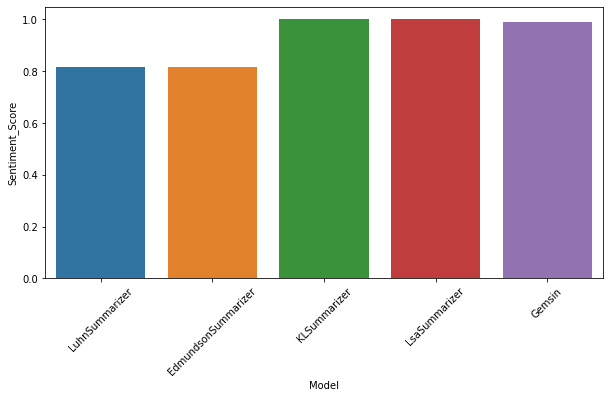

In [ ]:
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=data_summary['Model'],y=data_summary['Sentiment_Score'])
plot.set_xticklabels(rotation=45, labels=data_summary['Model'])